In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate
import yfinance as yf

ticker = '^GSPC'
index_data = yf.download(ticker,start="2000-01-02",end="2023-12-01")

[*********************100%%**********************]  1 of 1 completed


In [2]:
index_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


<Axes: xlabel='Date'>

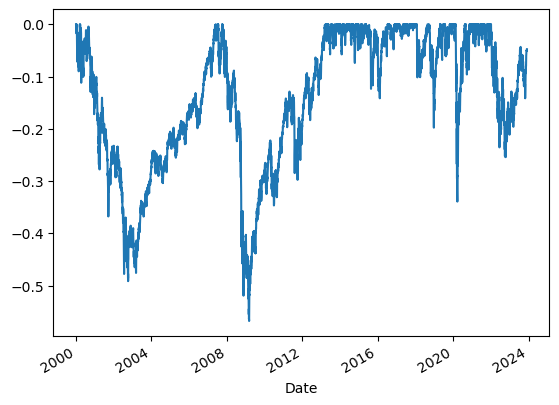

In [3]:
daily_close_pct_change = index_data['Adj Close'].pct_change()
index_level = 1000* (1 + daily_close_pct_change).cumprod()
previous_peak = index_level.cummax()
drawdown = (index_level-previous_peak)/ previous_peak
drawdown.plot()

In [4]:
#Calculating Value at Risk

daily_close_pct_change.sort_values(inplace=True, ascending=True)

VaR_90 = daily_close_pct_change.quantile(0.1)
VaR_95 = daily_close_pct_change.quantile(0.05)
VaR_99 = daily_close_pct_change.quantile(0.01)

print(tabulate([['90%', VaR_90],['95%', VaR_95],['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0129598
95%                      -0.0188817
99%                      -0.0344087


In [5]:
#Calculating Conditional VAR Expected losses beyond the VaR breakpoint

CVaR_90 = daily_close_pct_change[daily_close_pct_change <= VaR_90].mean()
CVaR_95 = daily_close_pct_change[daily_close_pct_change <= VaR_95].mean()
CVaR_99 = daily_close_pct_change[daily_close_pct_change <= VaR_99].mean()

print(tabulate([['90%', CVaR_90],['95%', CVaR_95],['99%', CVaR_99]], headers = ['Confidence Level', 'Conditional Value at Risk']))

Confidence Level      Conditional Value at Risk
------------------  ---------------------------
90%                                  -0.0226686
95%                                  -0.0297619
99%                                  -0.0497519
